# Кластеризация и Principal component analysis (PCA)

#### Описание проекта:

HELP International - это международная гуманитарная неправительственная организация, которая стремится бороться с бедностью и предоставлять людям из отсталых стран элементарные удобства и помощь во время стихийных бедствий. Время от времени он запускает множество операционных проектов наряду с пропагандистскими кампаниями, направленными на повышение осведомленности, а также в целях финансирования.

После недавних программ финансирования они смогли собрать около 10 миллионов долларов. Теперь генеральному директору НПО необходимо решить, как использовать эти деньги стратегически и эффективно. Существенные проблемы, возникающие при принятии этого решения, в основном связаны с выбором стран, которые больше всего нуждаются в помощи.

И вот здесь мы как специалисты по обработке данных. Наша задача - классифицировать страны, используя некоторые социально-экономические факторы и факторы здоровья, которые определяют общее развитие страны. Затем нам нужно предложить страны, на которых генеральному директору нужно сосредоточиться больше всего.

Источник: [URL](https://www.kaggle.com/ankandash/pca-k-means-clustering-hierarchical-clustering)

Данные: [Kaggle: Country Socioeconomic Data](https://www.kaggle.com/ashydv/country-socioeconomic-data)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
country_data = pd.read_csv('Country-data.csv')

In [3]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [82]:
# процент пропусков
np.round(100*(country_data.isnull().sum()/len(country_data.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [7]:
country_data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

### Проверяем на выбросы

<AxesSubplot:xlabel='gdpp'>

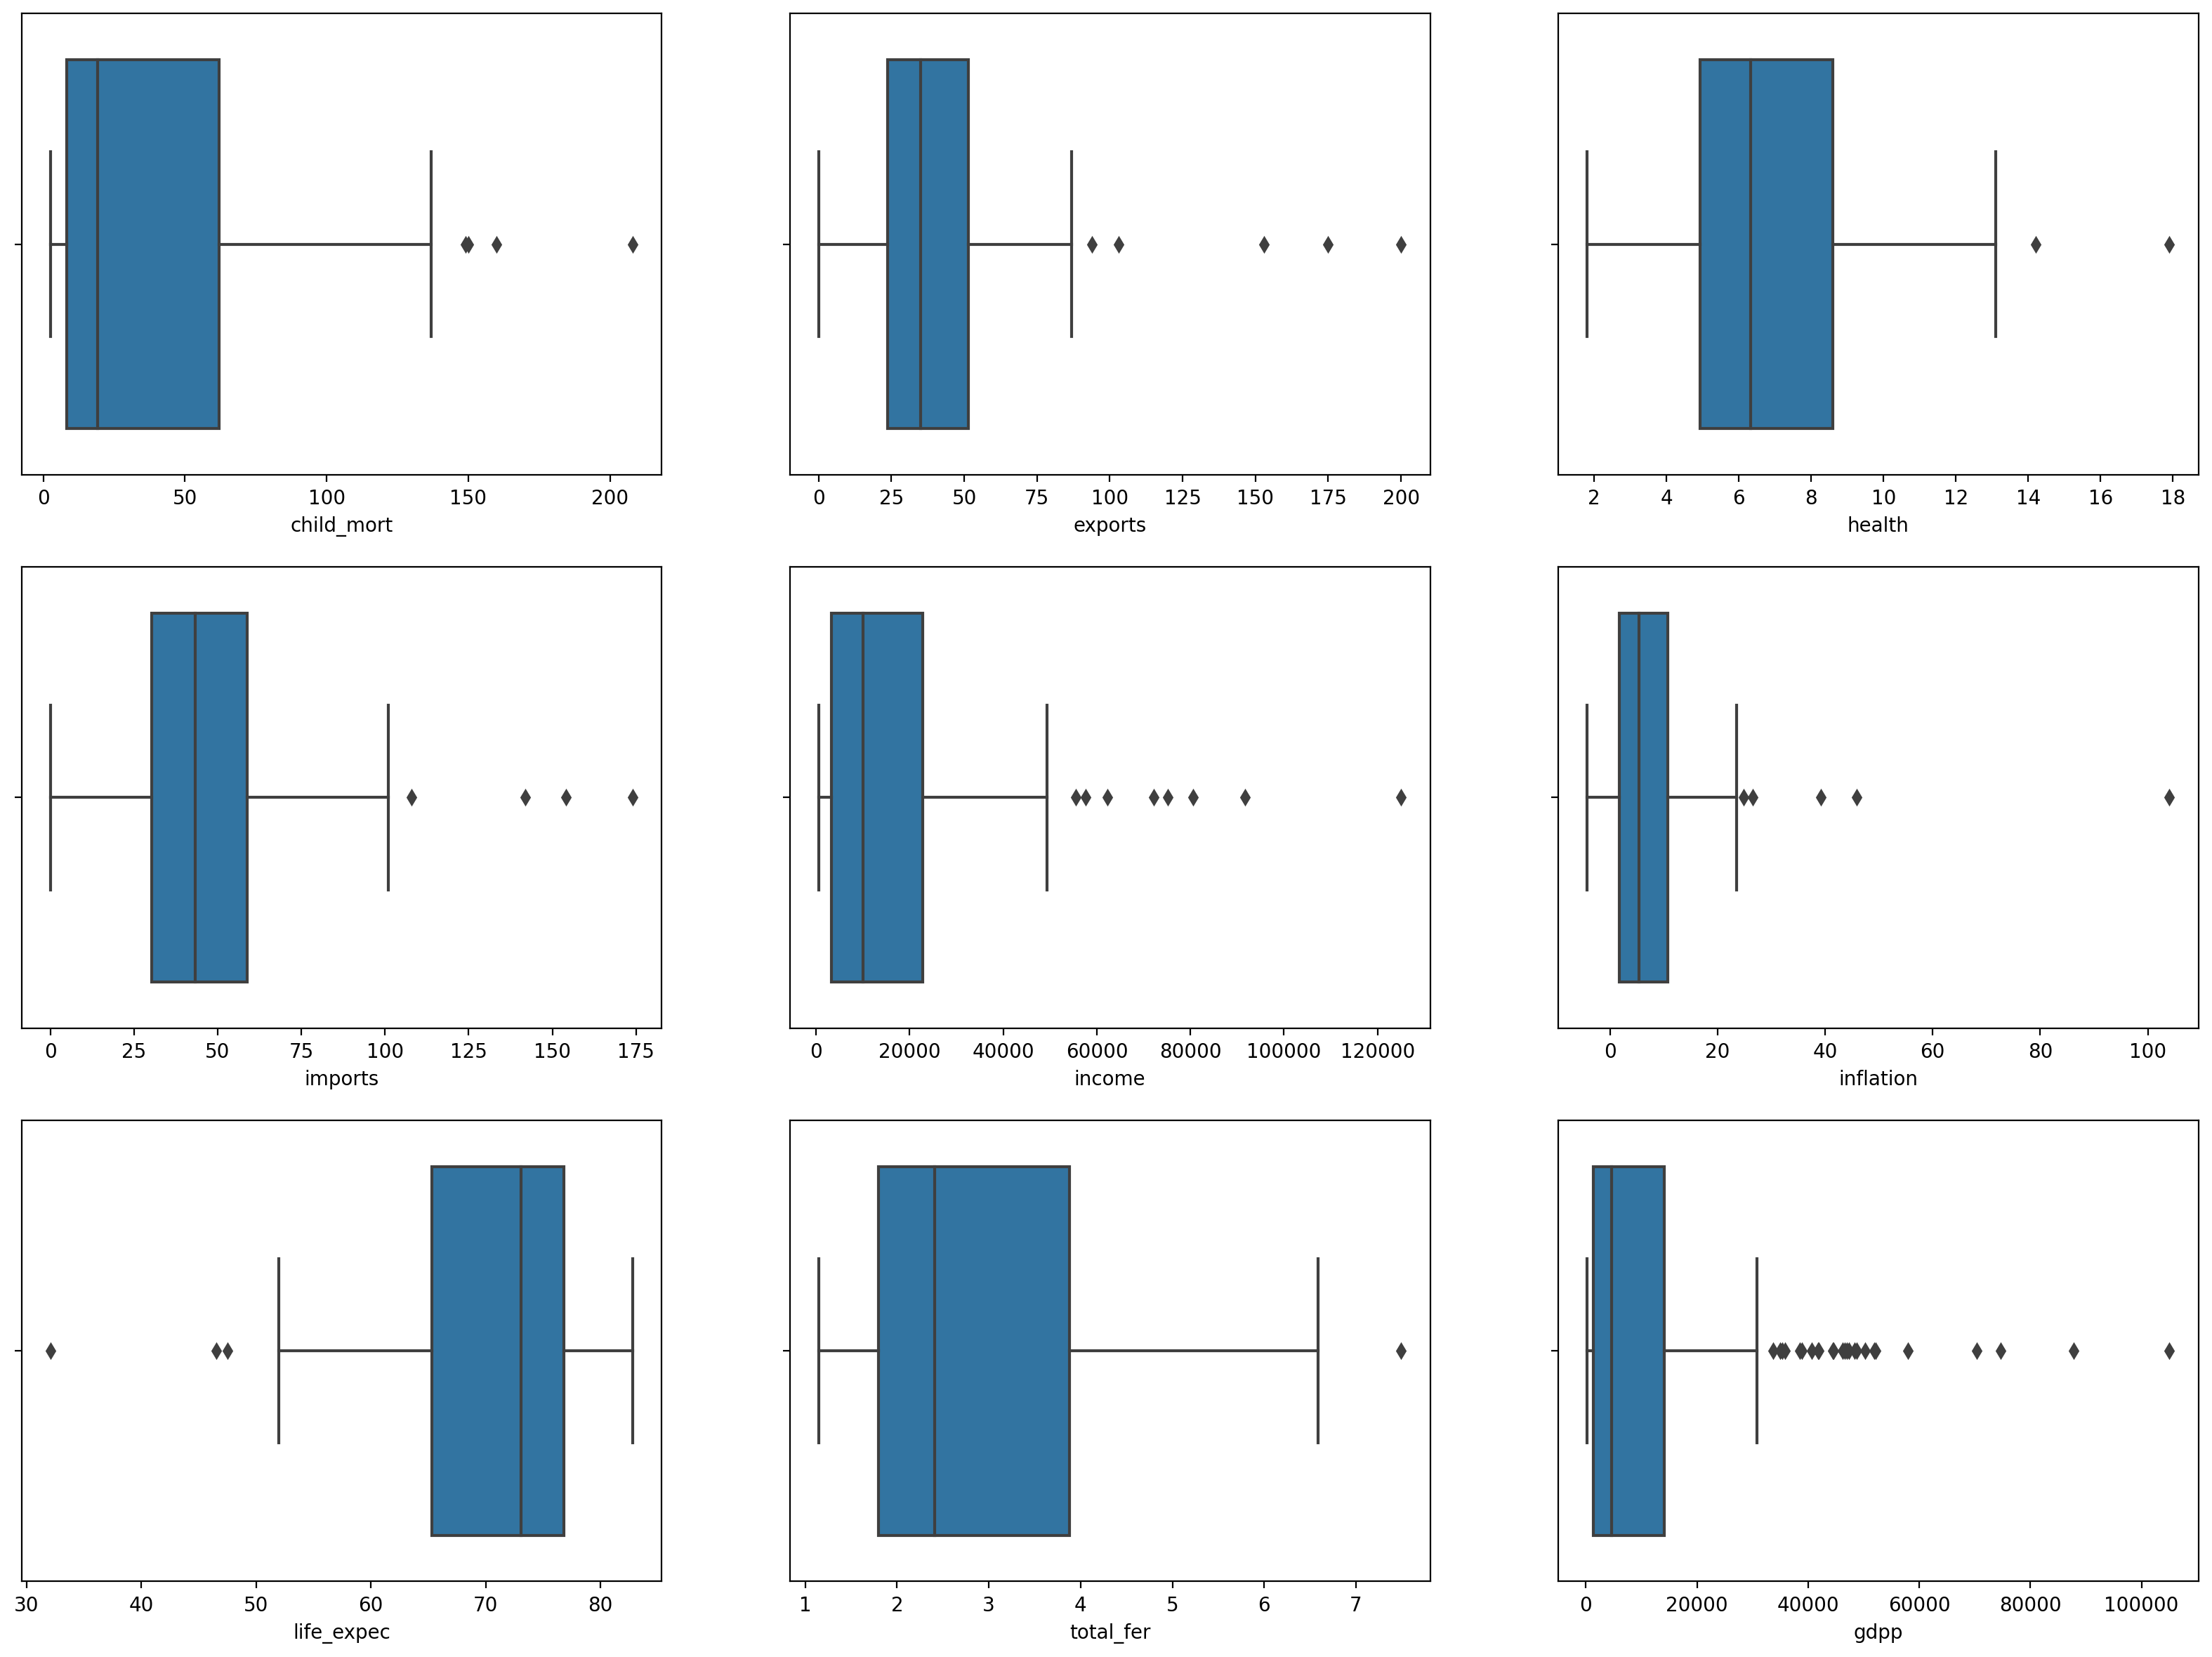

In [8]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'child_mort', data = country_data)

plt.subplot(4,3,2)
sns.boxplot(x = 'exports', data = country_data)

plt.subplot(4,3,3)
sns.boxplot(x = 'health', data = country_data)

plt.subplot(4,3,4)
sns.boxplot(x = 'imports', data = country_data)

plt.subplot(4,3,5)
sns.boxplot(x = 'income', data = country_data)

plt.subplot(4,3,6)
sns.boxplot(x = 'inflation', data = country_data)

plt.subplot(4,3,7)
sns.boxplot(x = 'life_expec', data = country_data)

plt.subplot(4,3,8)
sns.boxplot(x = 'total_fer', data = country_data)

plt.subplot(4,3,9)
sns.boxplot(x = 'gdpp', data = country_data)

**Использование Z-Score для определения выбросов**

Z-Scores могут количественно оценить необычность наблюдения, если ваши данные соответствуют нормальному распределению. Z-Scores - это количество стандартных отклонений выше и ниже среднего значения, на которое падает каждое значение. Например, Z-Score 2 означает, что наблюдение на два стандартных отклонения выше среднего, а Z-Score -2 означает, что это на два стандартных отклонения ниже среднего. Z-Score, равная нулю, представляет собой значение, равное среднему значению.

Чтобы вычислить Z-Score для наблюдения, возьмите необработанное измерение, вычтите среднее значение и разделите на стандартное отклонение. Математически формула этого процесса следующая:

$$Z-Score = \frac{X-\mu}{\sigma}$$

Чем дальше Z-Score наблюдения отличается от нуля, тем она более необычна. Стандартным пороговым значением для обнаружения выбросов является Z-Score +/- 3 или больше от нуля. Распределение вероятностей ниже отображает распределение Z-Scores в стандартном нормальном распределении.

<img src="https://i1.wp.com/statisticsbyjim.com/wp-content/uploads/2019/10/Z-scores.png?w=576&ssl=1">

In [9]:
# используем z-score

from scipy import stats

z = np.abs(stats.zscore(country_data[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]))
print(z)
print()

# порог для определения выбросов – 3
print('Индексы выбросов:')

print(np.where(z > 3))

[[1.29153238 1.13827979 0.27908825 ... 1.61909203 1.90288227 0.67917961]
 [0.5389489  0.47965843 0.09701618 ... 0.64786643 0.85997281 0.48562324]
 [0.27283273 0.09912164 0.96607302 ... 0.67042323 0.0384044  0.46537561]
 ...
 [0.37231541 1.13030491 0.0088773  ... 0.28695762 0.66120626 0.63775406]
 [0.44841668 0.40647827 0.59727159 ... 0.34463279 1.14094382 0.63775406]
 [1.11495062 0.15034774 0.33801514 ... 2.09278484 1.6246091  0.62954556]]

Индексы выбросов:
(array([ 23,  66,  66,  82,  91,  91,  91,  91,  98,  98, 112, 113, 114,
       123, 123, 132, 133, 133, 145, 159, 163]), array([4, 0, 6, 4, 1, 3, 4, 8, 1, 3, 7, 5, 8, 4, 8, 0, 1, 3, 8, 2, 5]))


In [10]:
# удалим выбросы
country_data_outliers_removed = country_data[(z<3).all(axis=1)]

In [11]:
country_data_outliers_removed.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [12]:
print('Размер выборки до удаления выбросов: ' + str(country_data.shape))
print('Размер выборки после удаления выбросов: ' + str(country_data_outliers_removed.shape))

Размер выборки до удаления выбросов: (167, 10)
Размер выборки после удаления выбросов: (153, 10)


In [13]:
X = country_data_outliers_removed.drop('country',axis =1)  
y = country_data_outliers_removed['country']

In [14]:
X.shape    

(153, 9)

In [15]:
y.shape

(153,)

### PCA

In [16]:
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [17]:
y.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

Стандартизируем данные перед тем как применить PCA:

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_scaled[:5,:5]

array([[ 1.46183636, -1.41330427,  0.31809414, -0.04379952, -0.95456912],
       [-0.56911214, -0.52600184, -0.08875965,  0.15011384, -0.331921  ],
       [-0.27385196, -0.01333821, -1.02886841, -0.75132124, -0.10965359],
       [ 2.25655534,  1.16480224, -1.55027327, -0.14861755, -0.63351618],
       [-0.74295692,  0.3366533 , -0.29416156,  0.68992671,  0.354339  ]])

In [20]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [21]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)

In [22]:
X_scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.461836,-1.413304,0.318094,-0.043800,-0.954569,0.348785,-1.738235,1.944385,-0.722055
1,-0.569112,-0.526002,-0.088760,0.150114,-0.331921,-0.365865,0.712299,-0.886986,-0.467590
2,-0.273852,-0.013338,-1.028868,-0.751321,-0.109654,1.310315,0.736682,-0.045044,-0.440971
3,2.256555,1.164802,-1.550273,-0.148618,-0.633516,2.219869,-1.262759,2.175240,-0.507878
4,-0.742957,0.336653,-0.294162,0.689927,0.354339,-0.806205,0.773257,-0.561073,0.115874


<AxesSubplot:>

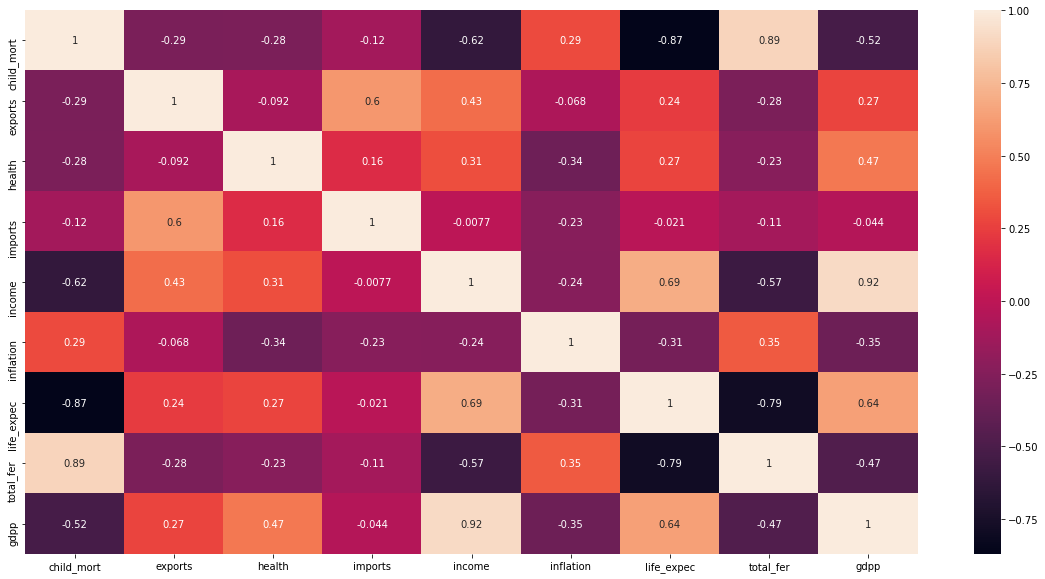

In [23]:
# Матрица корреляций
plt.figure(figsize = (20,10))       
sns.heatmap(X_scaled_df.corr(),annot = True)

Среди некоторых признаков наблюдается значительая корреляция (например, `life_expec` и `child_mort`, `life_expec` и `total_fer`).

In [24]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)
pca.fit(X_scaled)

PCA(random_state=42)

In [25]:
pca.components_[0]

array([-0.42321972,  0.2036042 ,  0.21754201,  0.08290998,  0.41369318,
       -0.22650995,  0.42715413, -0.40550525,  0.39482635])

In [26]:
pca.explained_variance_ratio_

array([0.47638387, 0.16902847, 0.13080614, 0.10179586, 0.06939066,
       0.02084938, 0.01747184, 0.00883956, 0.00543422])

In [27]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.47638387, 0.64541234, 0.77621848, 0.87801434, 0.94740499,
       0.96825437, 0.98572622, 0.99456578, 1.        ])

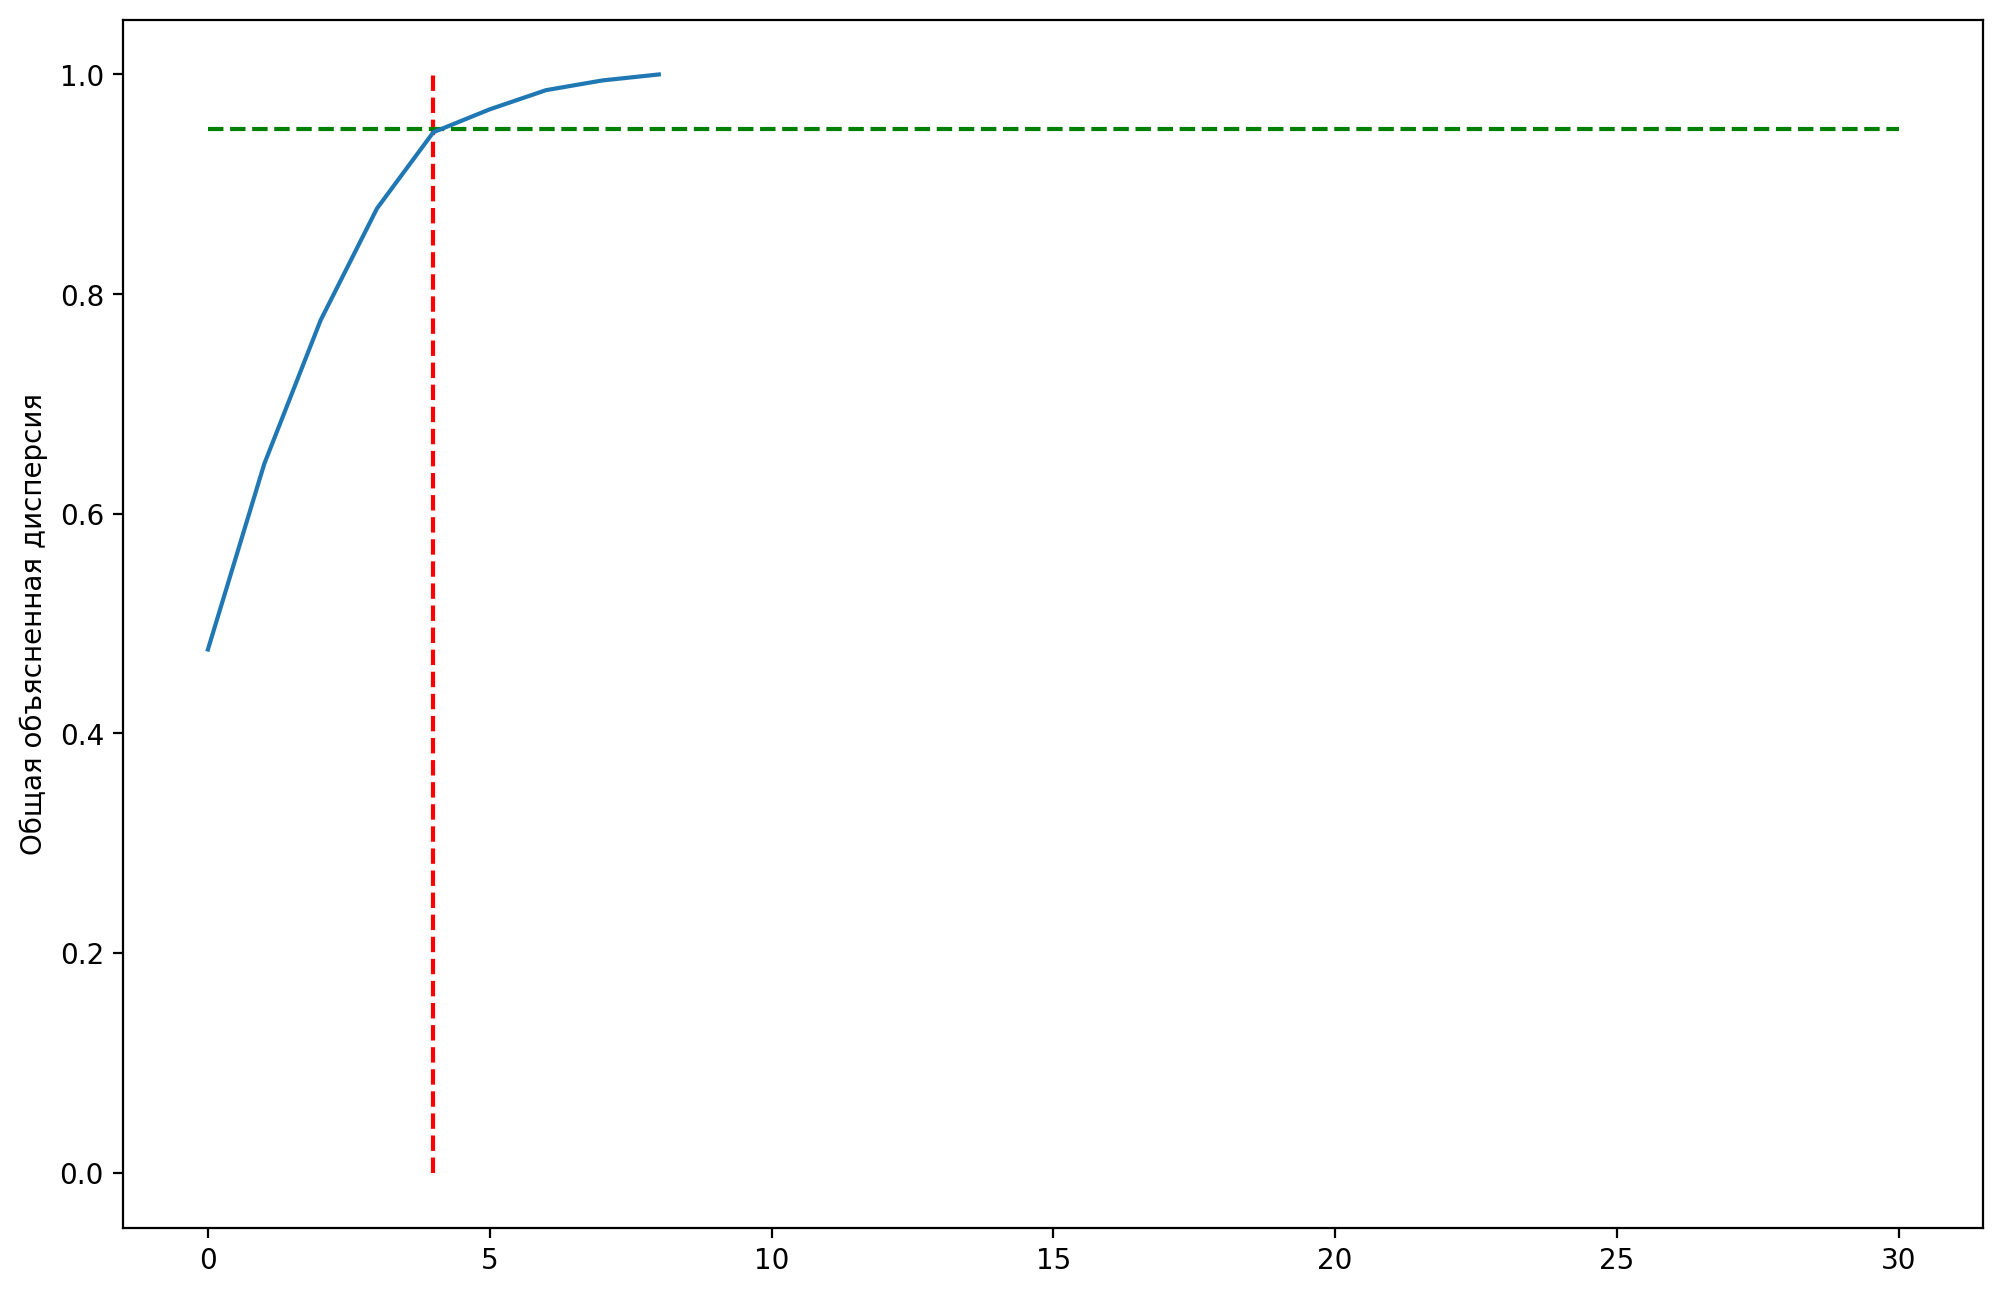

In [28]:
fig = plt.figure(figsize=[12,8],dpi=200)
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Общая объясненная дисперсия")
plt.show()

Применим PCA с 4 компонентами. 

Инкрементный анализ главных компонентов (IPCA) обычно используется в качестве замены анализа главных компонентов (PCA), когда набор данных для декомпозиции слишком велик для размещения в памяти. IPCA строит приближение низкого ранга для входных данных, используя объем памяти, который не зависит от количества выборок входных данных. Он по-прежнему зависит от исходных признаков, но изменение размера пакета позволяет контролировать использование памяти.

In [29]:
from sklearn.decomposition import IncrementalPCA

pca_final = IncrementalPCA(n_components=4)
X_pca_final = pca_final.fit_transform(X_scaled)

In [30]:
print(X.shape)
print(X_pca_final.shape)

(153, 9)
(153, 4)


In [31]:
corrmat = np.corrcoef(X_pca_final.transpose())

In [32]:
corrmat.shape

(4, 4)

<AxesSubplot:>

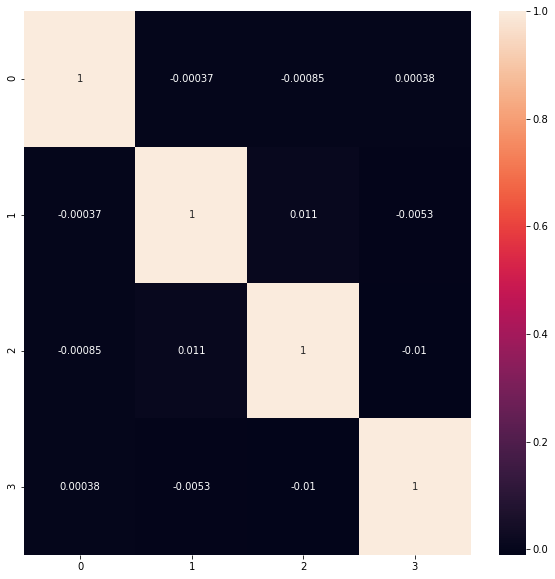

In [33]:
# Корреляционная матрица на новых признаках
plt.figure(figsize=[10,10])
sns.heatmap(corrmat, annot=True)

# Кластеризация

### K-means 

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [35]:
# k-средство с произвольным k (количеством кластеров)
kmeans = KMeans(n_clusters=5, max_iter=1000)
kmeans.fit(X_pca_final)

KMeans(max_iter=1000, n_clusters=5)

In [36]:
kmeans.labels_

array([0, 1, 4, 0, 1, 4, 4, 3, 3, 4, 3, 2, 4, 1, 1, 2, 1, 0, 1, 4, 1, 0,
       4, 1, 0, 0, 1, 0, 3, 1, 0, 0, 4, 4, 4, 0, 0, 0, 1, 0, 1, 2, 2, 3,
       4, 4, 4, 1, 0, 0, 2, 1, 3, 3, 4, 0, 1, 3, 0, 3, 1, 4, 0, 0, 1, 2,
       3, 4, 4, 4, 4, 2, 3, 3, 4, 3, 1, 4, 0, 0, 1, 0, 1, 1, 0, 0, 4, 2,
       1, 0, 0, 2, 2, 0, 0, 1, 1, 1, 4, 1, 1, 0, 4, 1, 4, 3, 3, 2, 0, 2,
       1, 4, 4, 1, 3, 1, 4, 0, 1, 4, 0, 1, 2, 2, 2, 1, 0, 2, 3, 4, 1, 0,
       1, 3, 4, 0, 1, 0, 0, 1, 1, 4, 1, 0, 1, 2, 3, 4, 4, 1, 1, 0, 0],
      dtype=int32)

Найдем оптимальное число кластеров с помощью "метода локтя" (elbow method). 

Введем следующие определения:

* Искажение (distortion): рассчитывается как среднее квадратов расстояний от центров соответствующих кластеров. Обычно используется метрика евклидова расстояния.
* Инерция (inertia): это сумма квадратов расстояний от образцов до ближайшего центра кластера.

Будем итерироваться по диапозону числа кластеров и вычислять значения инерций для каждого значения k.

Чтобы определить оптимальное количество кластеров, мы должны выбрать значение k в «изгибе», то есть в точке, после которой искажение / инерция начинает линейно уменьшаться. Таким образом, для заданных данных мы заключаем, что оптимальное количество кластеров для данных - 4.

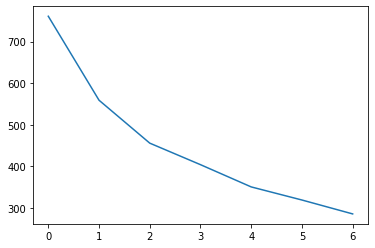

In [37]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca_final)
    
    ssd.append(kmeans.inertia_)
    
# график со значениями инерции для каждого возможного количества кластеров
plt.plot(ssd)

Анализ с помощью коэффициента силуэта:

In [38]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # инициализируем KMeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca_final)
    
    cluster_labels = kmeans.labels_
    
    # считаем коэффициент силуэта
    silhouette_avg = silhouette_score(X_pca_final, cluster_labels)
    print("Для n_clusters={0}, коэффициент силуэта={1}".format(num_clusters, silhouette_avg))

Для n_clusters=2, коэффициент силуэта=0.3185783255391956
Для n_clusters=3, коэффициент силуэта=0.32147147365246853
Для n_clusters=4, коэффициент силуэта=0.30692081115076797
Для n_clusters=5, коэффициент силуэта=0.29870075124497775
Для n_clusters=6, коэффициент силуэта=0.28319531220259475
Для n_clusters=7, коэффициент силуэта=0.26638755962187116
Для n_clusters=8, коэффициент силуэта=0.2835125260357757


In [39]:
# финальная модель с 4 кластерами
kmeans = KMeans(n_clusters=4, max_iter=1000, random_state=42)
kmeans.fit(X_pca_final)

KMeans(max_iter=1000, n_clusters=4, random_state=42)

In [40]:
kmeans.labels_

array([1, 3, 0, 1, 3, 0, 0, 2, 2, 0, 2, 2, 0, 3, 3, 2, 3, 1, 3, 0, 3, 1,
       0, 3, 1, 1, 3, 1, 2, 3, 1, 1, 0, 0, 0, 1, 1, 1, 3, 1, 3, 2, 3, 2,
       0, 0, 0, 3, 1, 1, 3, 3, 2, 2, 0, 1, 3, 2, 1, 2, 3, 0, 1, 1, 3, 3,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 3, 0, 1, 1, 3, 1, 3, 3, 1, 1, 0, 3,
       3, 1, 1, 3, 3, 1, 1, 3, 3, 3, 0, 3, 3, 1, 0, 1, 0, 2, 2, 0, 1, 3,
       3, 0, 0, 3, 2, 3, 0, 1, 3, 0, 1, 3, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1,
       3, 2, 1, 1, 3, 1, 1, 3, 3, 0, 3, 1, 3, 2, 2, 0, 0, 3, 3, 1, 1],
      dtype=int32)

In [41]:
country_data_outliers_removed['K-Means_Cluster_ID'] = kmeans.labels_

/Users/a18509896/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
country_data_outliers_removed.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='gdpp'>

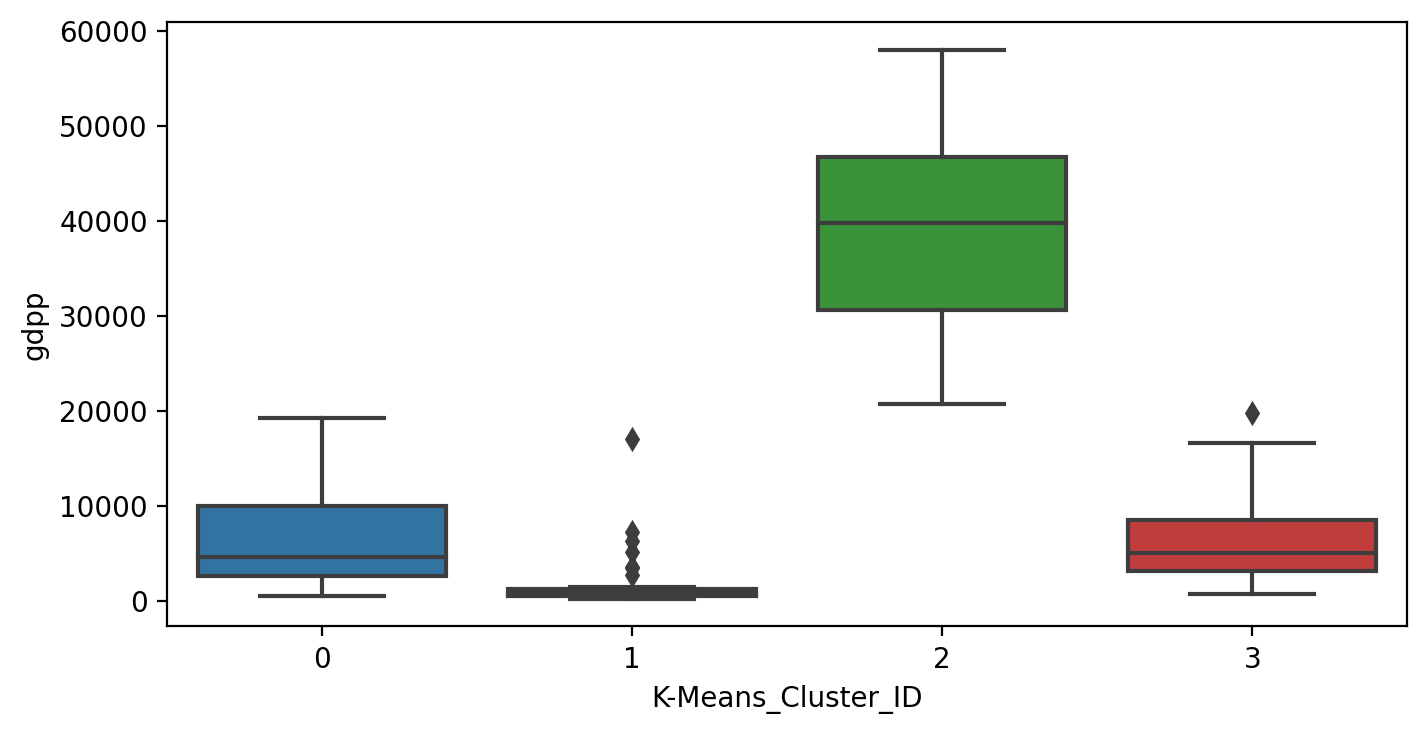

In [43]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='gdpp', data=country_data_outliers_removed)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='child_mort'>

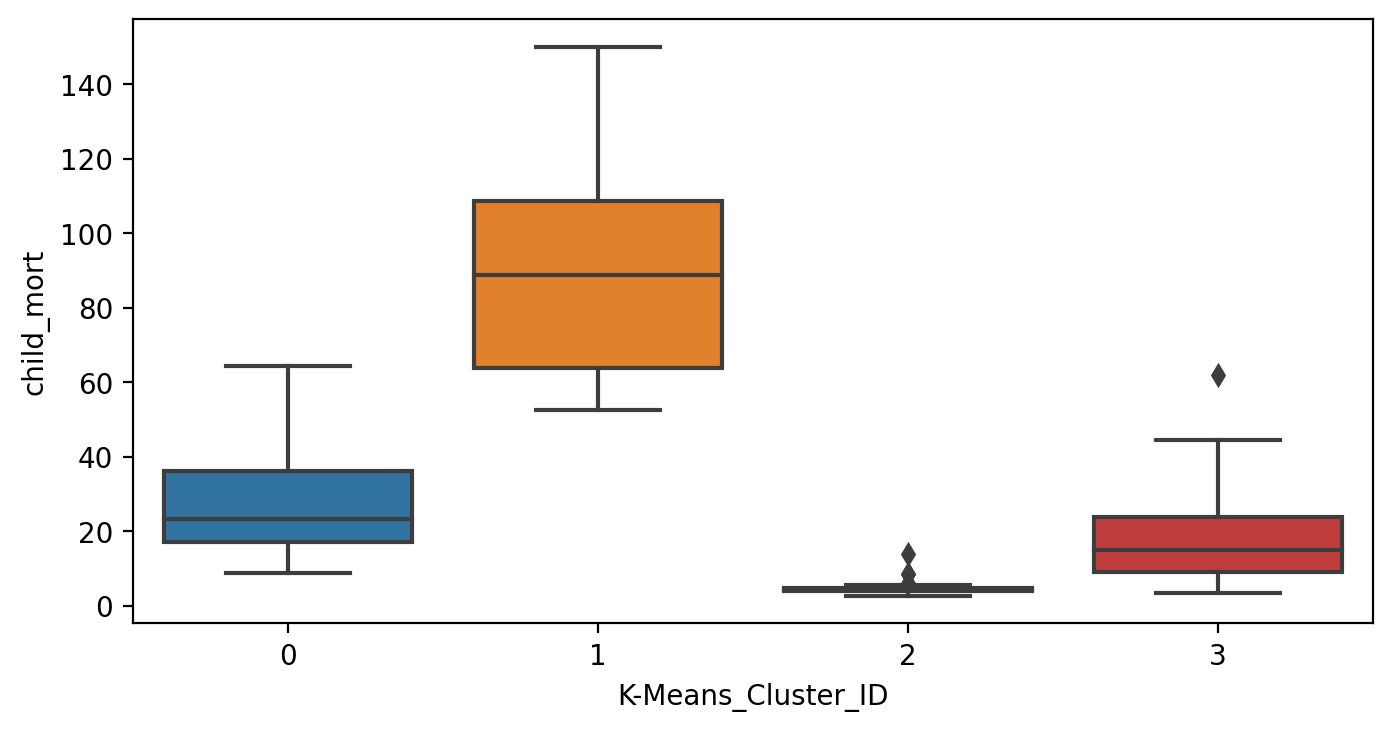

In [44]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='child_mort', data=country_data_outliers_removed)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='income'>

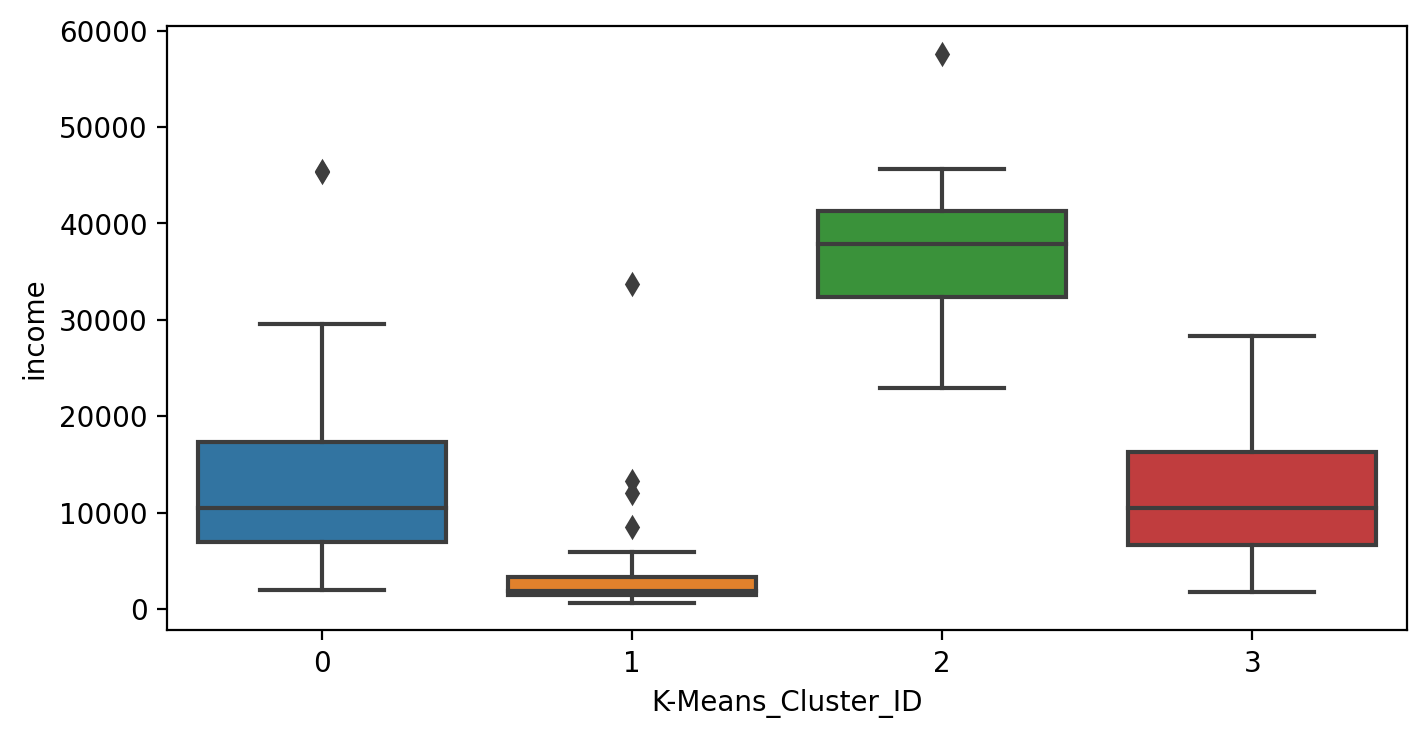

In [45]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='income', data=country_data_outliers_removed)

## Иерархическая кластеризация

In [46]:
X_scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.461836,-1.413304,0.318094,-0.043800,-0.954569,0.348785,-1.738235,1.944385,-0.722055
1,-0.569112,-0.526002,-0.088760,0.150114,-0.331921,-0.365865,0.712299,-0.886986,-0.467590
2,-0.273852,-0.013338,-1.028868,-0.751321,-0.109654,1.310315,0.736682,-0.045044,-0.440971
3,2.256555,1.164802,-1.550273,-0.148618,-0.633516,2.219869,-1.262759,2.175240,-0.507878
4,-0.742957,0.336653,-0.294162,0.689927,0.354339,-0.806205,0.773257,-0.561073,0.115874


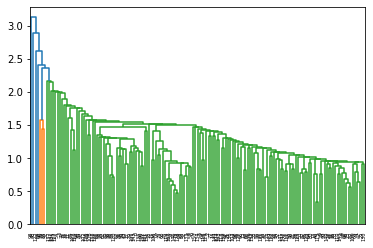

In [47]:
# одинарная связь
sl_mergings = linkage(X_scaled_df, method="single", metric='euclidean')
dendrogram(sl_mergings)
plt.show()

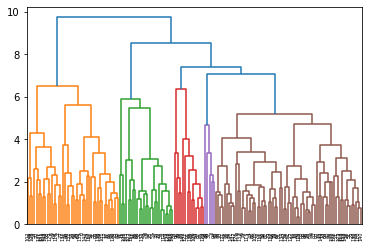

In [48]:
# полная связь
cl_mergings = linkage(X_scaled_df, method="complete", metric='euclidean')
dendrogram(cl_mergings)
plt.show()

In [49]:
# 4 кластера с одинарной связью
sl_cluster_labels = cut_tree(sl_mergings, n_clusters=4).reshape(-1, )
sl_cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Кластеризация с одинарной связью не выделила кластеры, поэтому используем полную.

In [50]:
# 4 кластера с полной связью
cl_cluster_labels = cut_tree(cl_mergings, n_clusters=4).reshape(-1, )
cl_cluster_labels

array([0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 0, 3, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 3,
       2, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 3, 1, 1, 1, 1, 3, 3, 2, 3,
       1, 0, 0, 3, 3, 0, 1, 1, 3, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 2, 0, 3,
       1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 0, 1, 3, 3, 1, 1, 1, 1, 2, 0, 1, 0,
       1, 2, 1, 0, 3, 0, 0, 1, 1, 1, 3, 0, 1, 2, 2, 1, 0, 1, 1, 0, 0])

In [51]:
country_data_outliers_removed["Hierarchical_Cluster_labels"] = cl_cluster_labels

/Users/a18509896/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
country_data_outliers_removed.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID,Hierarchical_Cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3,1


<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='gdpp'>

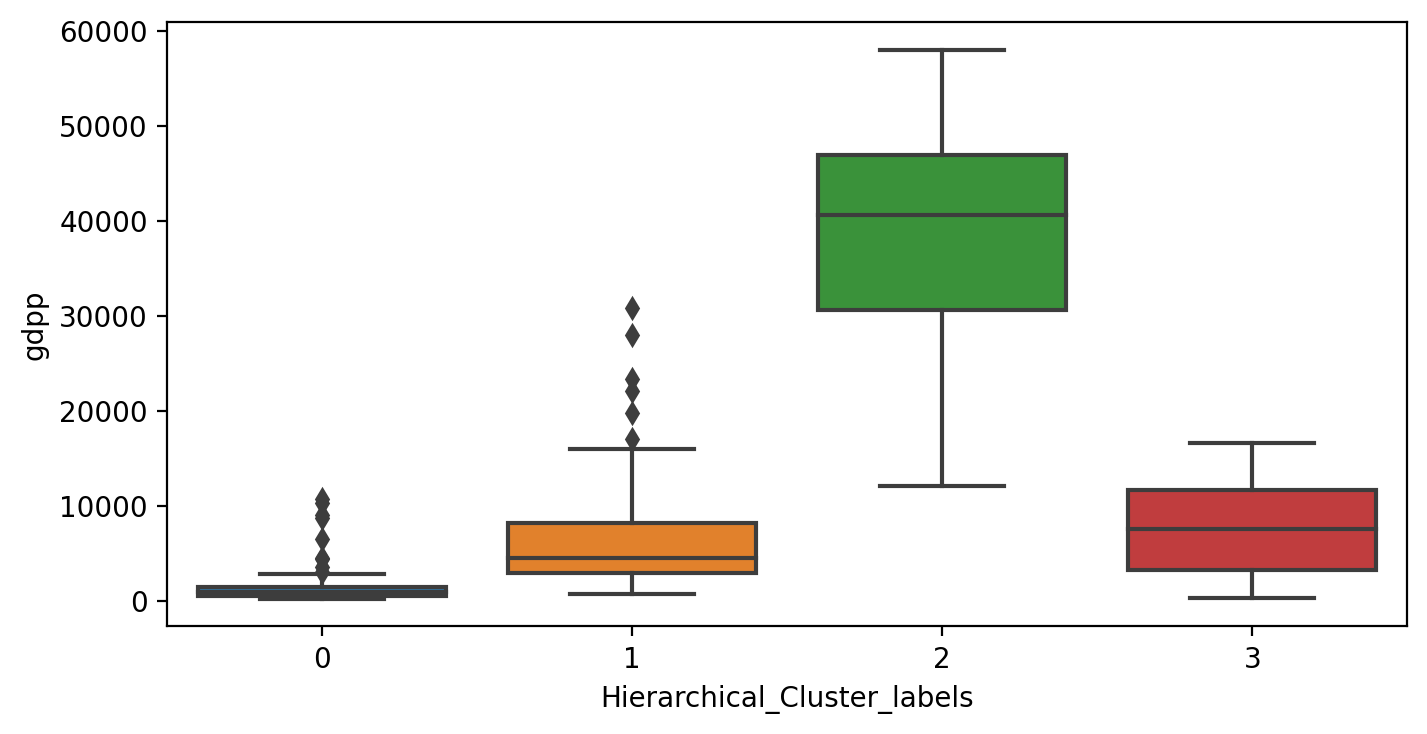

In [53]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='Hierarchical_Cluster_labels', y='gdpp', data=country_data_outliers_removed)

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='child_mort'>

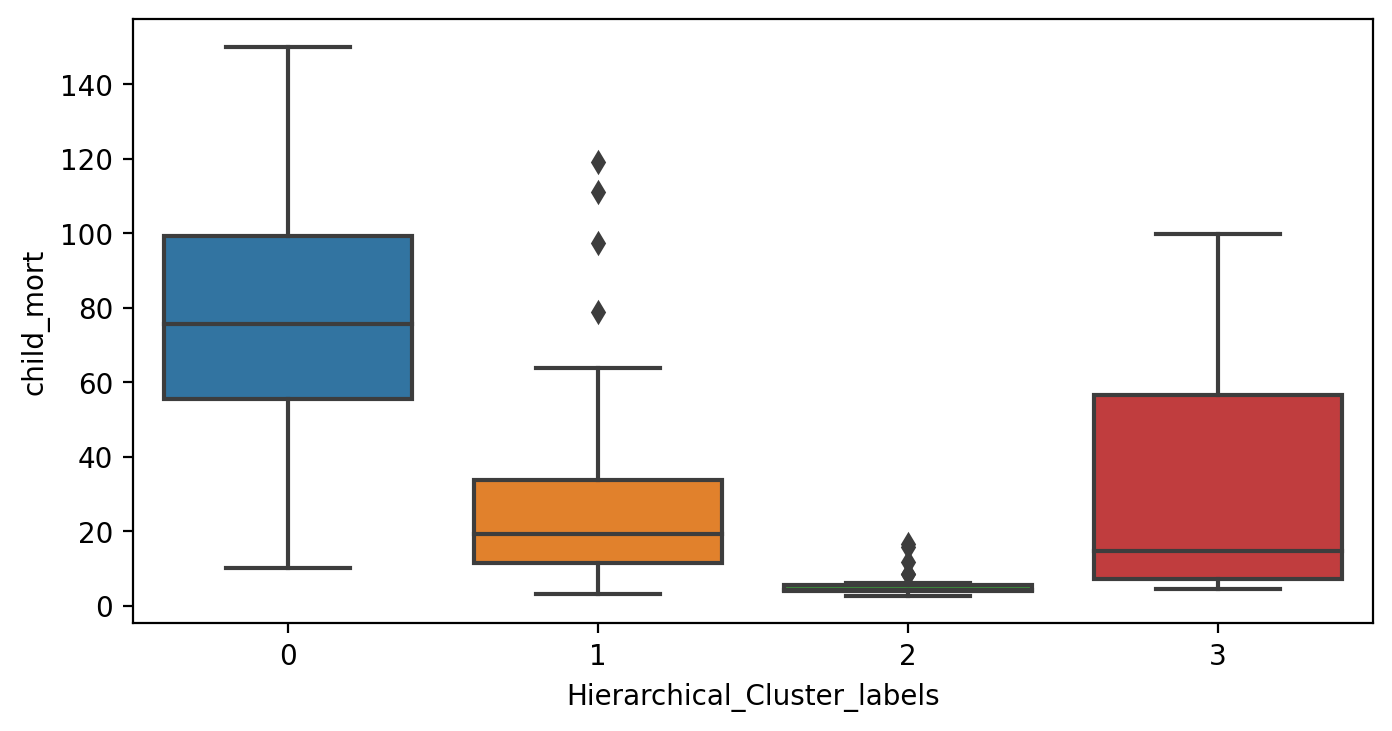

In [54]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='Hierarchical_Cluster_labels', y='child_mort', data=country_data_outliers_removed)

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='income'>

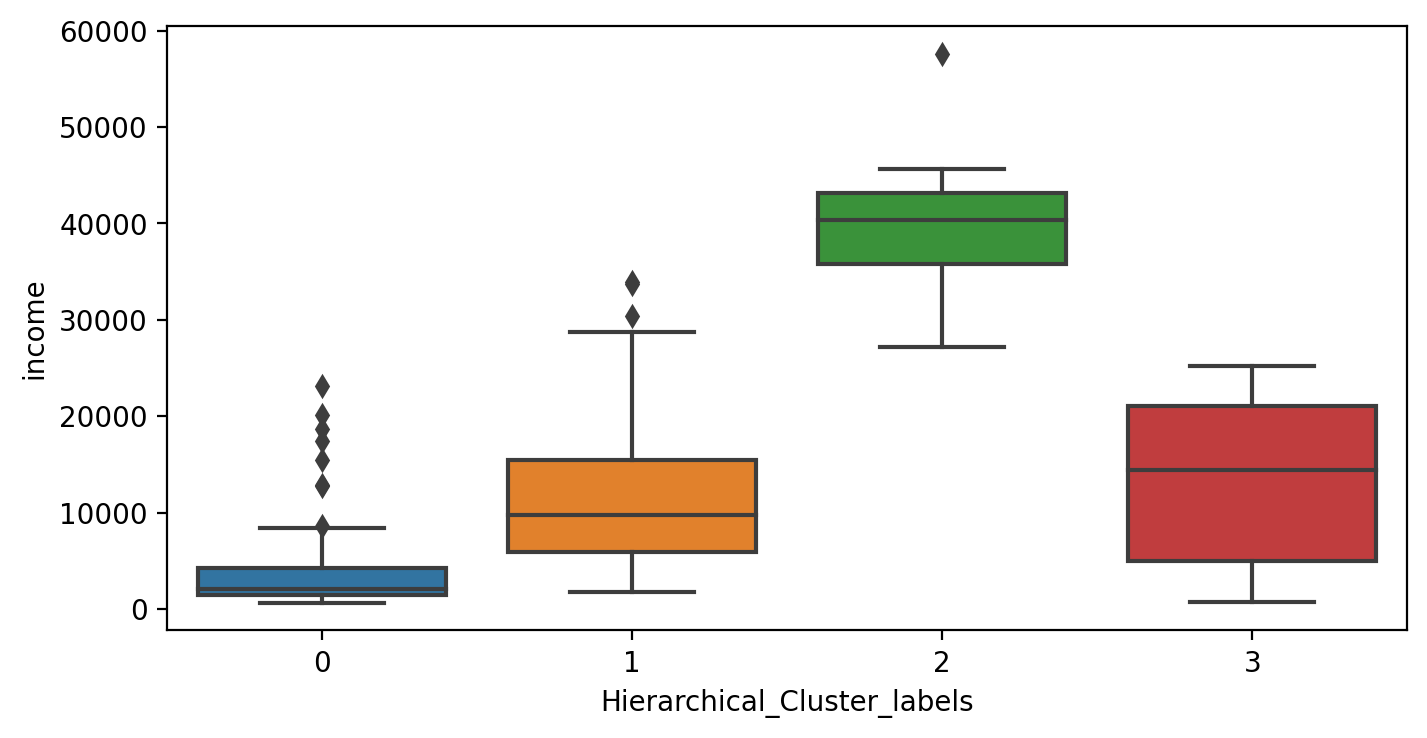

In [55]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='Hierarchical_Cluster_labels', y='income', data=country_data_outliers_removed)

In [56]:
country_data_outliers_removed.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID,Hierarchical_Cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3,1


<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='income'>

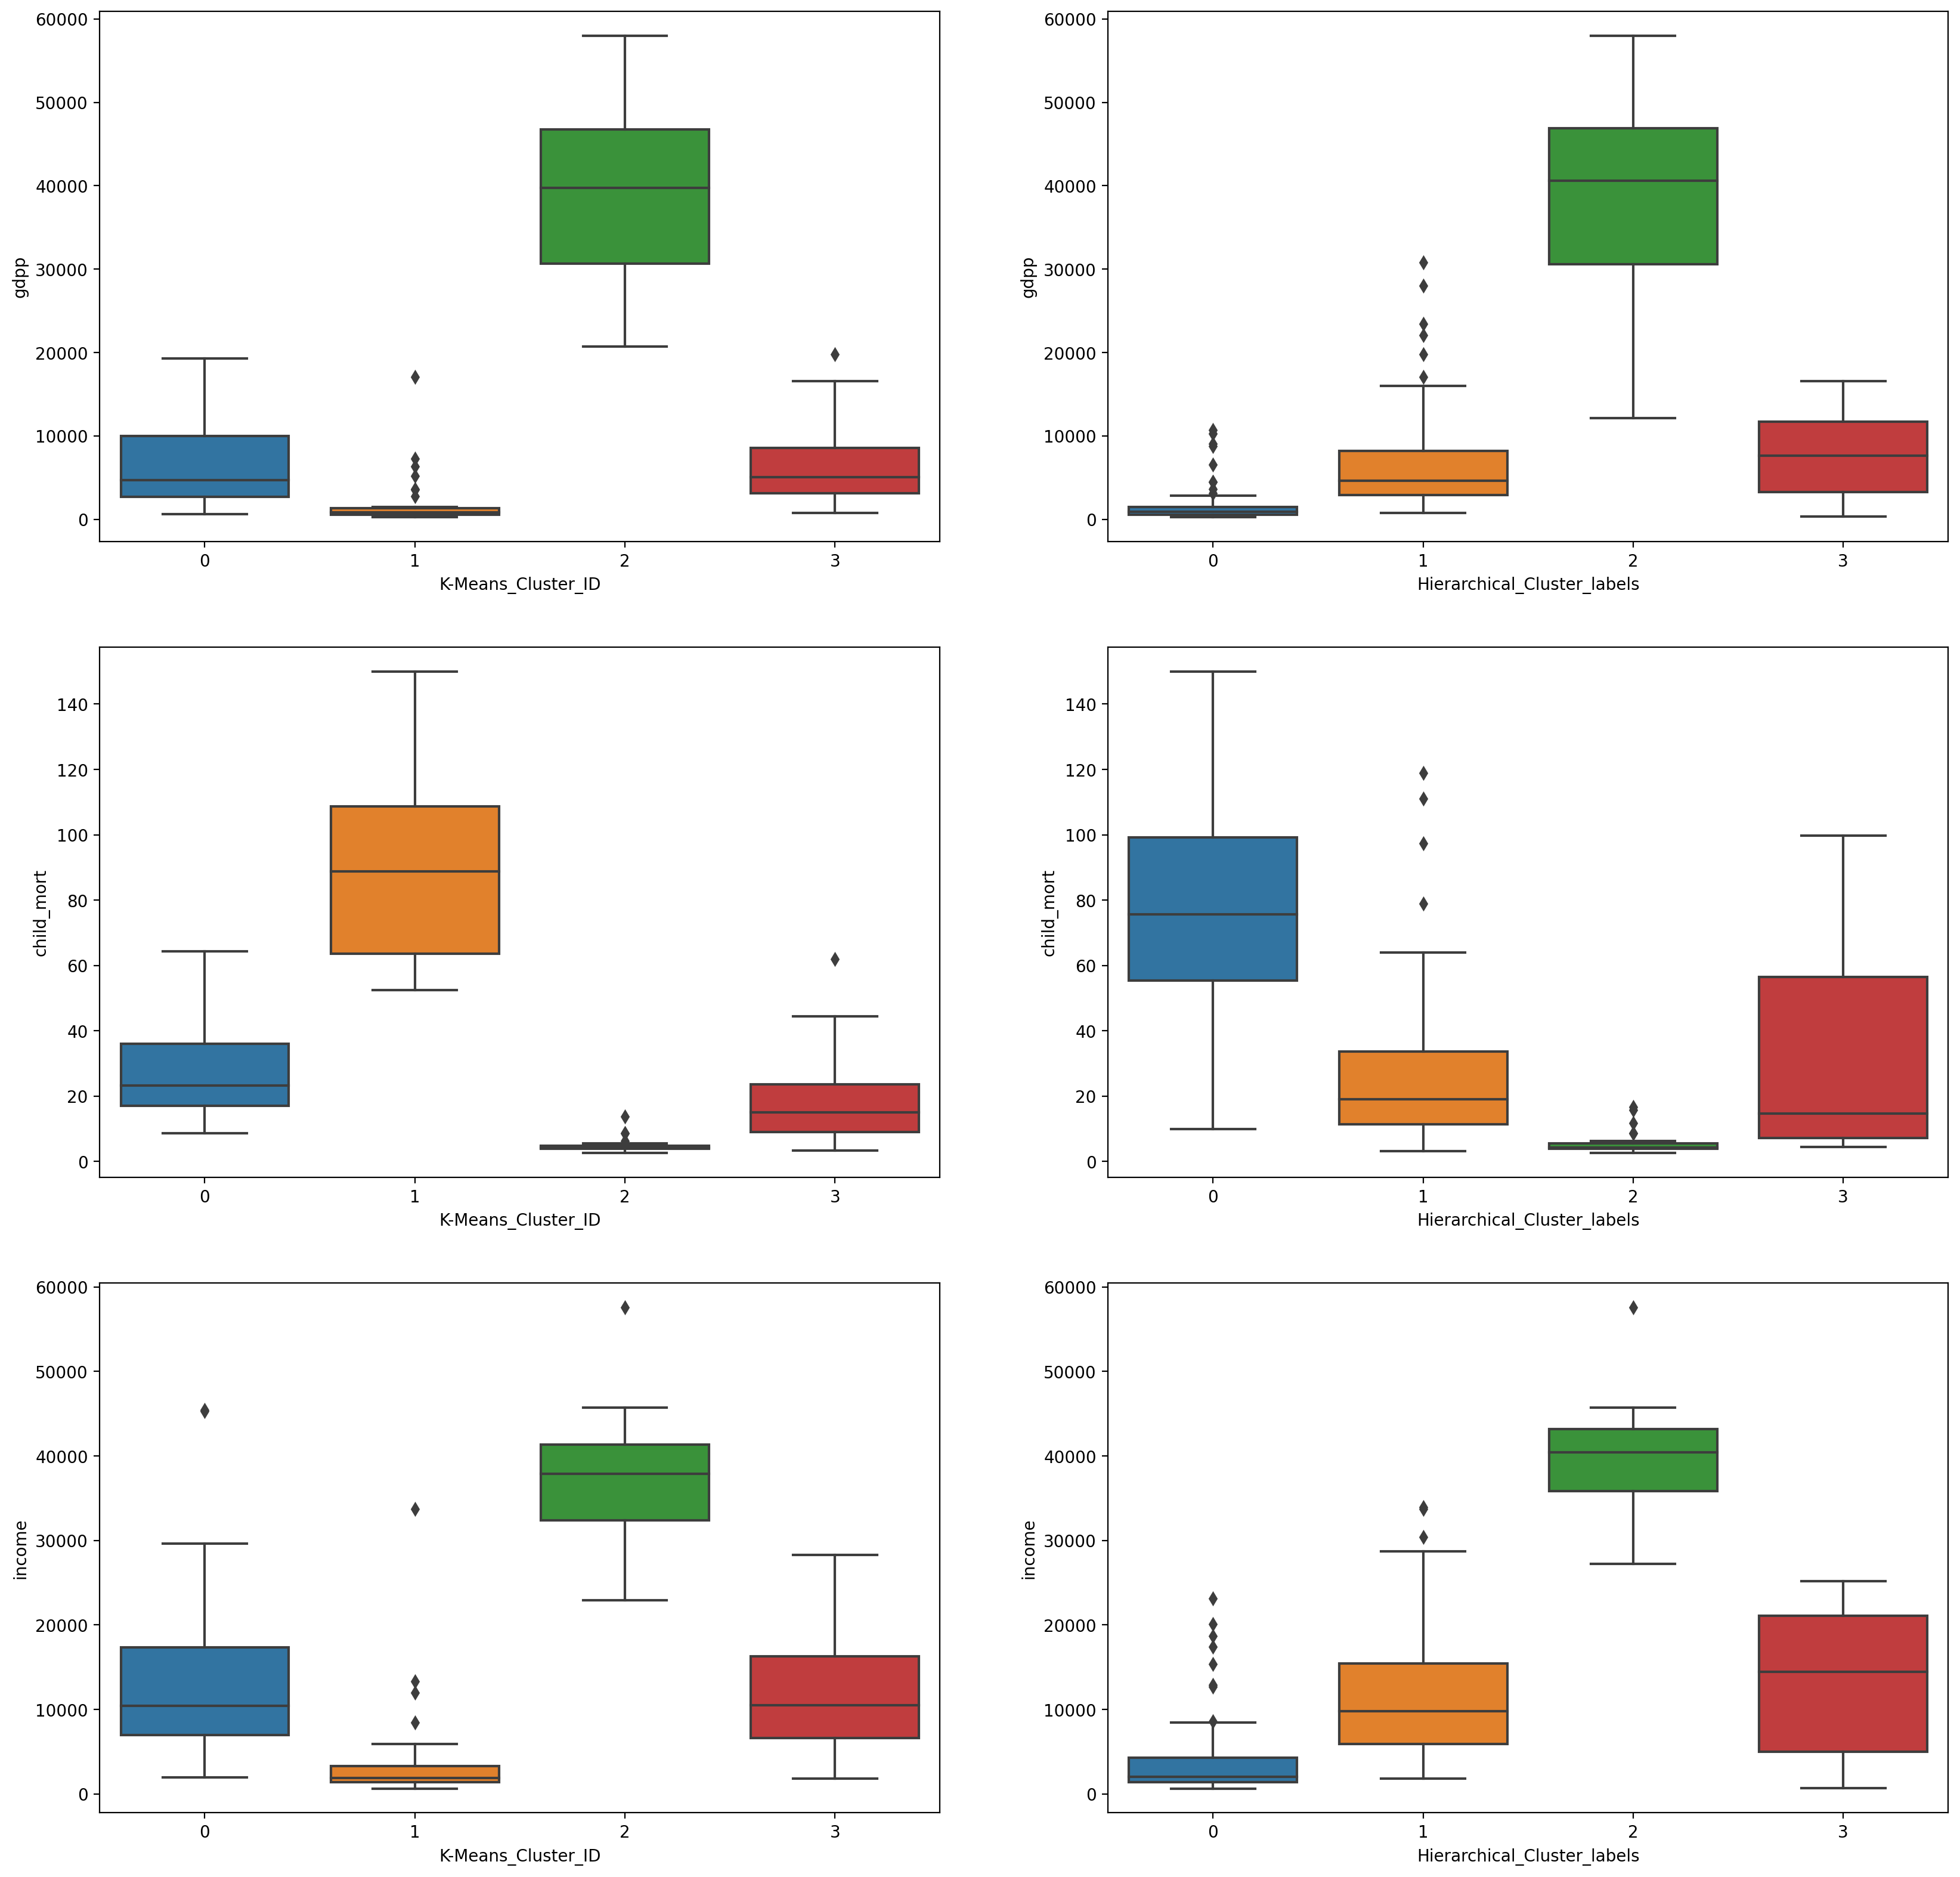

In [57]:
# анализируем результат

plt.figure(figsize=(20,20), dpi=200)

plt.subplot(3,2,1)
sns.boxplot(x='K-Means_Cluster_ID', y='gdpp', data=country_data_outliers_removed)

plt.subplot(3,2,2)
sns.boxplot(x='Hierarchical_Cluster_labels', y='gdpp', data=country_data_outliers_removed)

plt.subplot(3,2,3)
sns.boxplot(x='K-Means_Cluster_ID', y='child_mort', data=country_data_outliers_removed)

plt.subplot(3,2,4)
sns.boxplot(x='Hierarchical_Cluster_labels', y='child_mort', data=country_data_outliers_removed)

plt.subplot(3,2,5)
sns.boxplot(x='K-Means_Cluster_ID', y='income', data=country_data_outliers_removed)

plt.subplot(3,2,6)
sns.boxplot(x='Hierarchical_Cluster_labels', y='income', data=country_data_outliers_removed)

In [58]:
X_pca_final_df = pd.DataFrame(X_pca_final,columns=['PC1','PC2','PC3','PC4'])

In [59]:
X_pca_final_df.head()

,PC1,PC2,PC3,PC4
0,-3.129112,-0.530438,1.326366,0.592673
1,0.552498,-0.242770,-0.157737,-1.362826
2,-0.357008,-0.461483,-1.876976,-0.109599
3,-3.456355,1.213750,-1.381585,2.217845
4,1.308078,0.615244,-0.031004,-0.713291


In [60]:
X_pca_final_df['K_Means_Cluster_ID'] = kmeans.labels_
X_pca_final_df['Hierarchical_Cluster_Labels'] = cl_cluster_labels

In [61]:
X_pca_final_df.head()

,PC1,PC2,PC3,PC4,K_Means_Cluster_ID,Hierarchical_Cluster_Labels
0,-3.129112,-0.530438,1.326366,0.592673,1,0
1,0.552498,-0.242770,-0.157737,-1.362826,3,1
2,-0.357008,-0.461483,-1.876976,-0.109599,0,0
3,-3.456355,1.213750,-1.381585,2.217845,1,1
4,1.308078,0.615244,-0.031004,-0.713291,3,1


Диаграмма рассеяния с использованием первых двух основных компонентов для наблюдения за распределением кластеров:

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

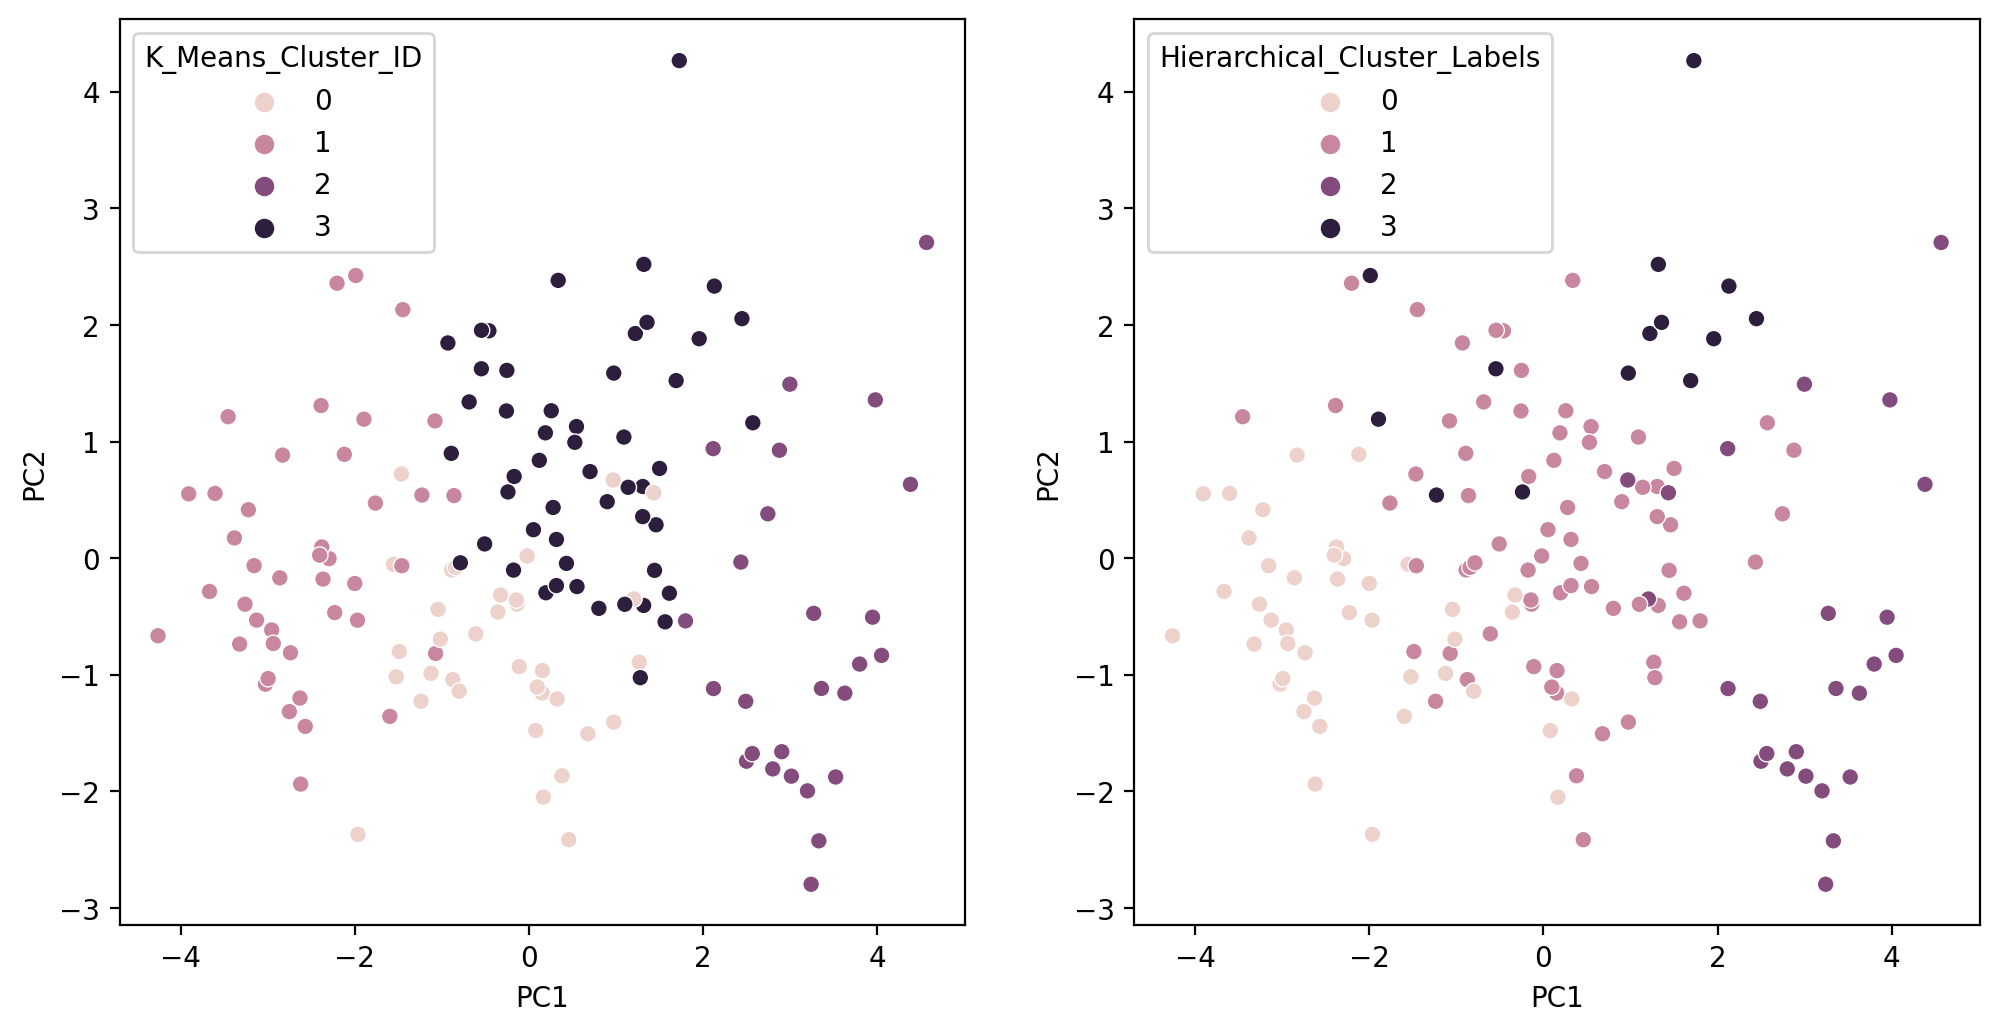

In [62]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='PC1',y='PC2',data=X_pca_final_df,hue='K_Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='PC1',y='PC2',data=X_pca_final_df,hue='Hierarchical_Cluster_Labels')

Диаграмма рассеяния  с признаками `the gdpp`, `child_mort`, `income` для наблюдения за распределением кластеров:

<AxesSubplot:xlabel='gdpp', ylabel='child_mort'>

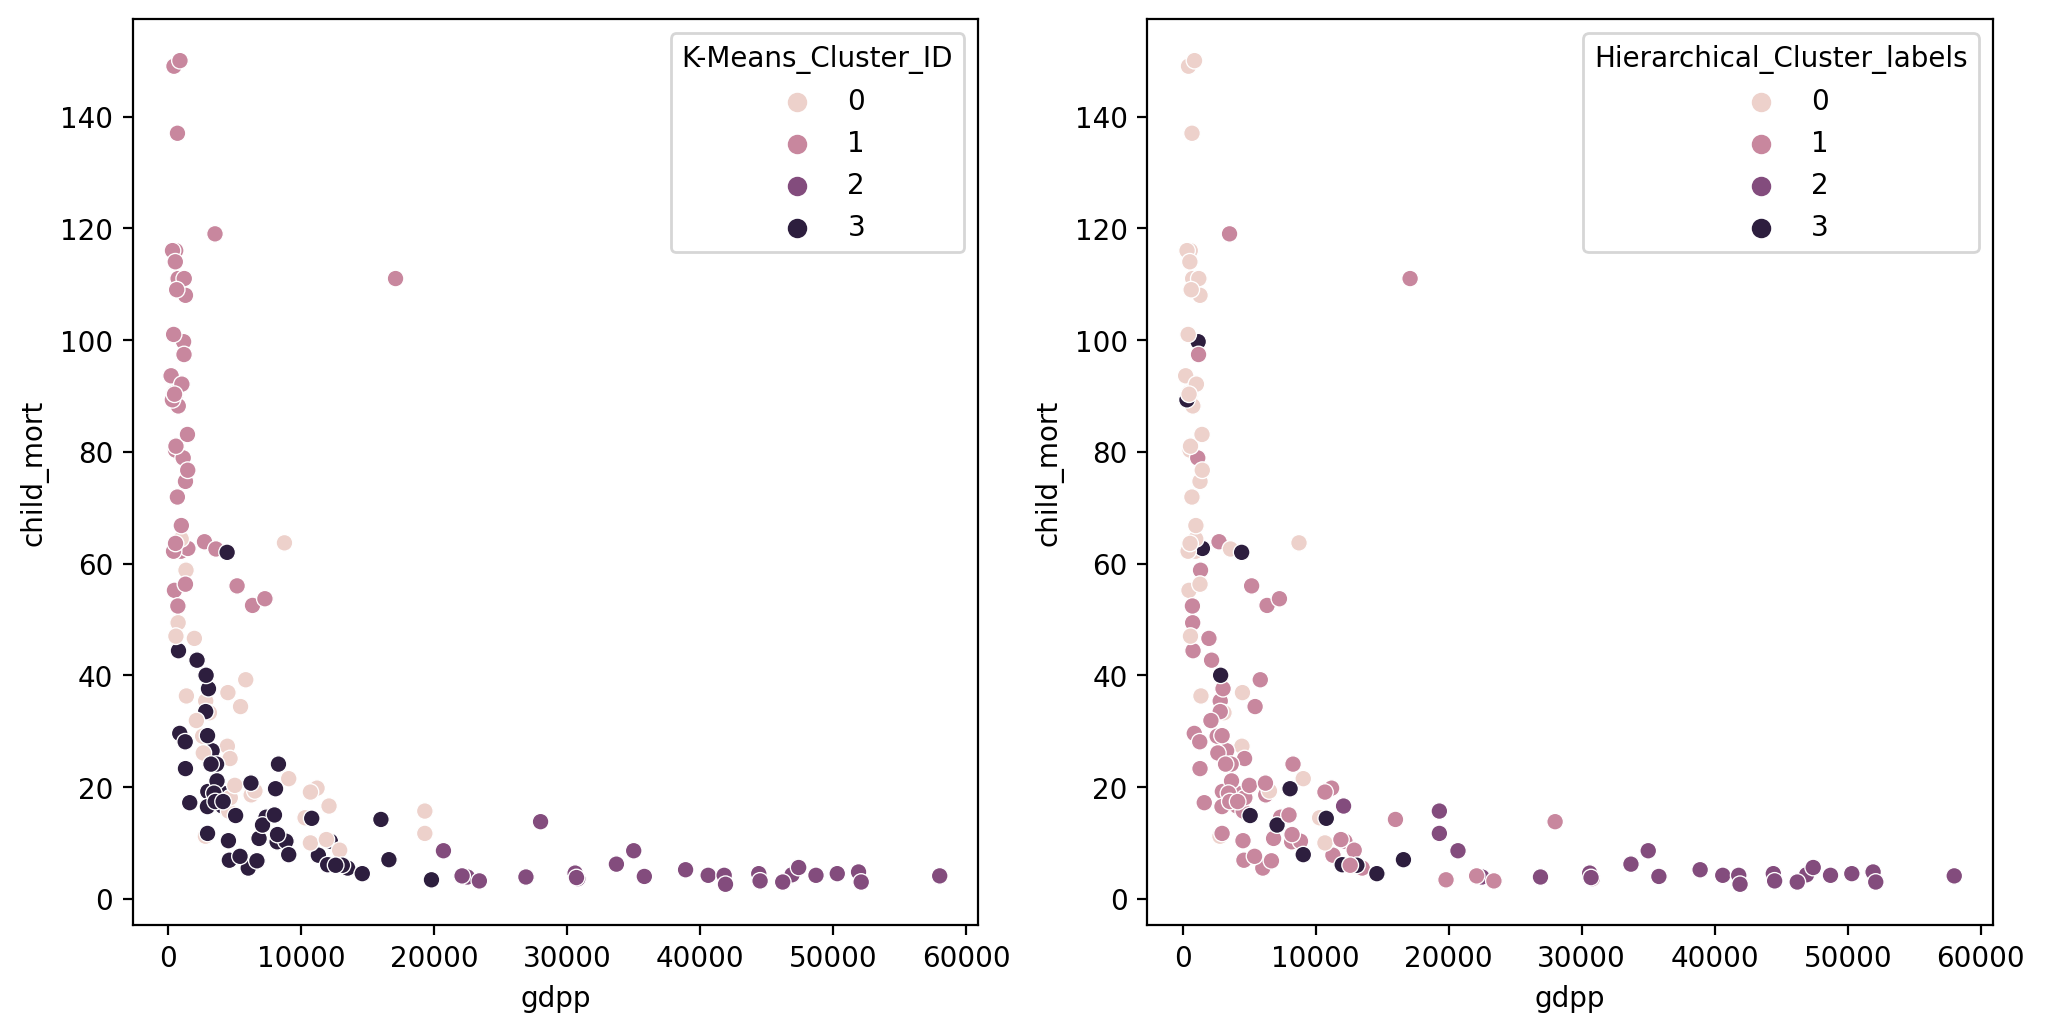

In [63]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='gdpp',y='child_mort',data=country_data_outliers_removed,hue='K-Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='gdpp',y='child_mort',data=country_data_outliers_removed,hue='Hierarchical_Cluster_labels')

Низкий ВВП на душу соответствует низкому доходу домохозяйства и, следовательно, более высокому уровню детской смертности.

<AxesSubplot:xlabel='gdpp', ylabel='income'>

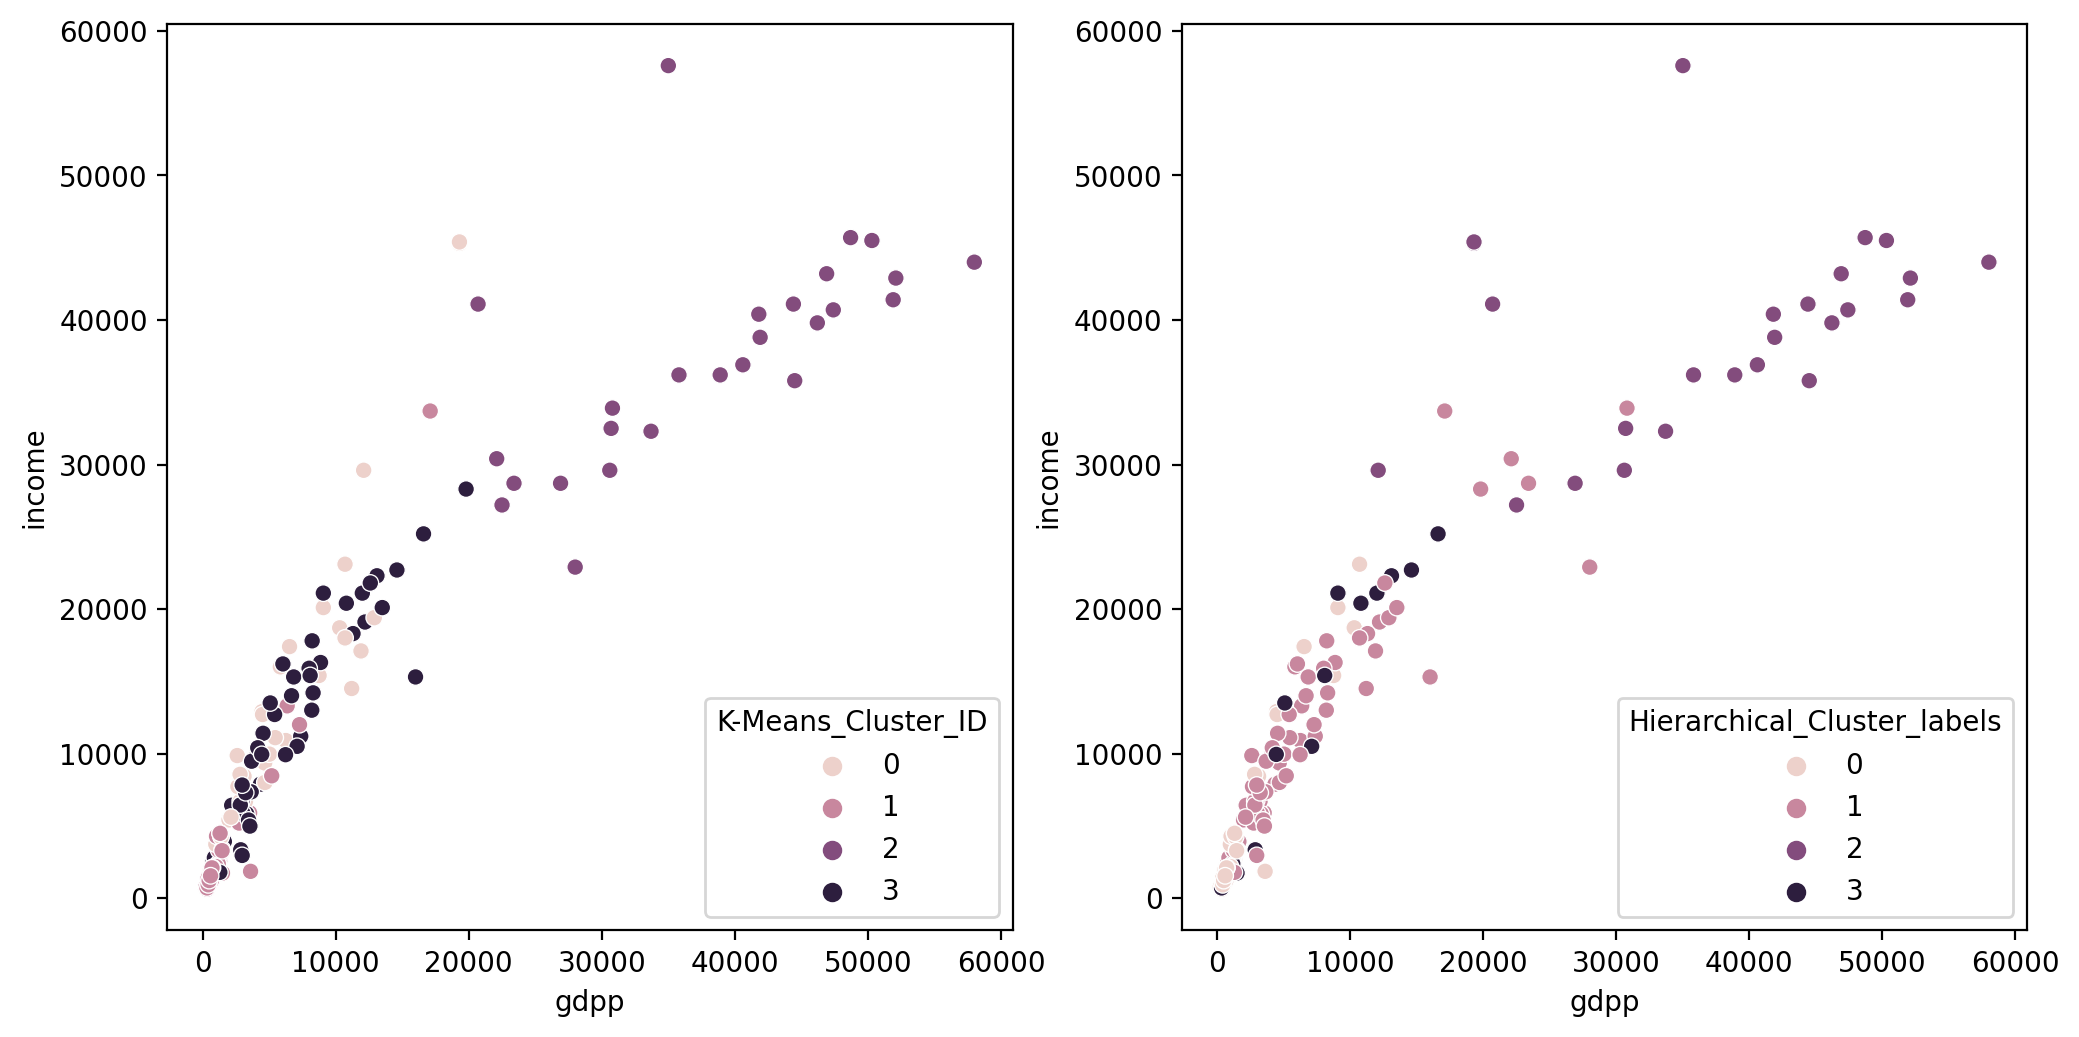

In [64]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='gdpp',y='income',data=country_data_outliers_removed,hue='K-Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='gdpp',y='income',data=country_data_outliers_removed,hue='Hierarchical_Cluster_labels')

ВВП на душу и доход связаны линейно.

<AxesSubplot:xlabel='child_mort', ylabel='income'>

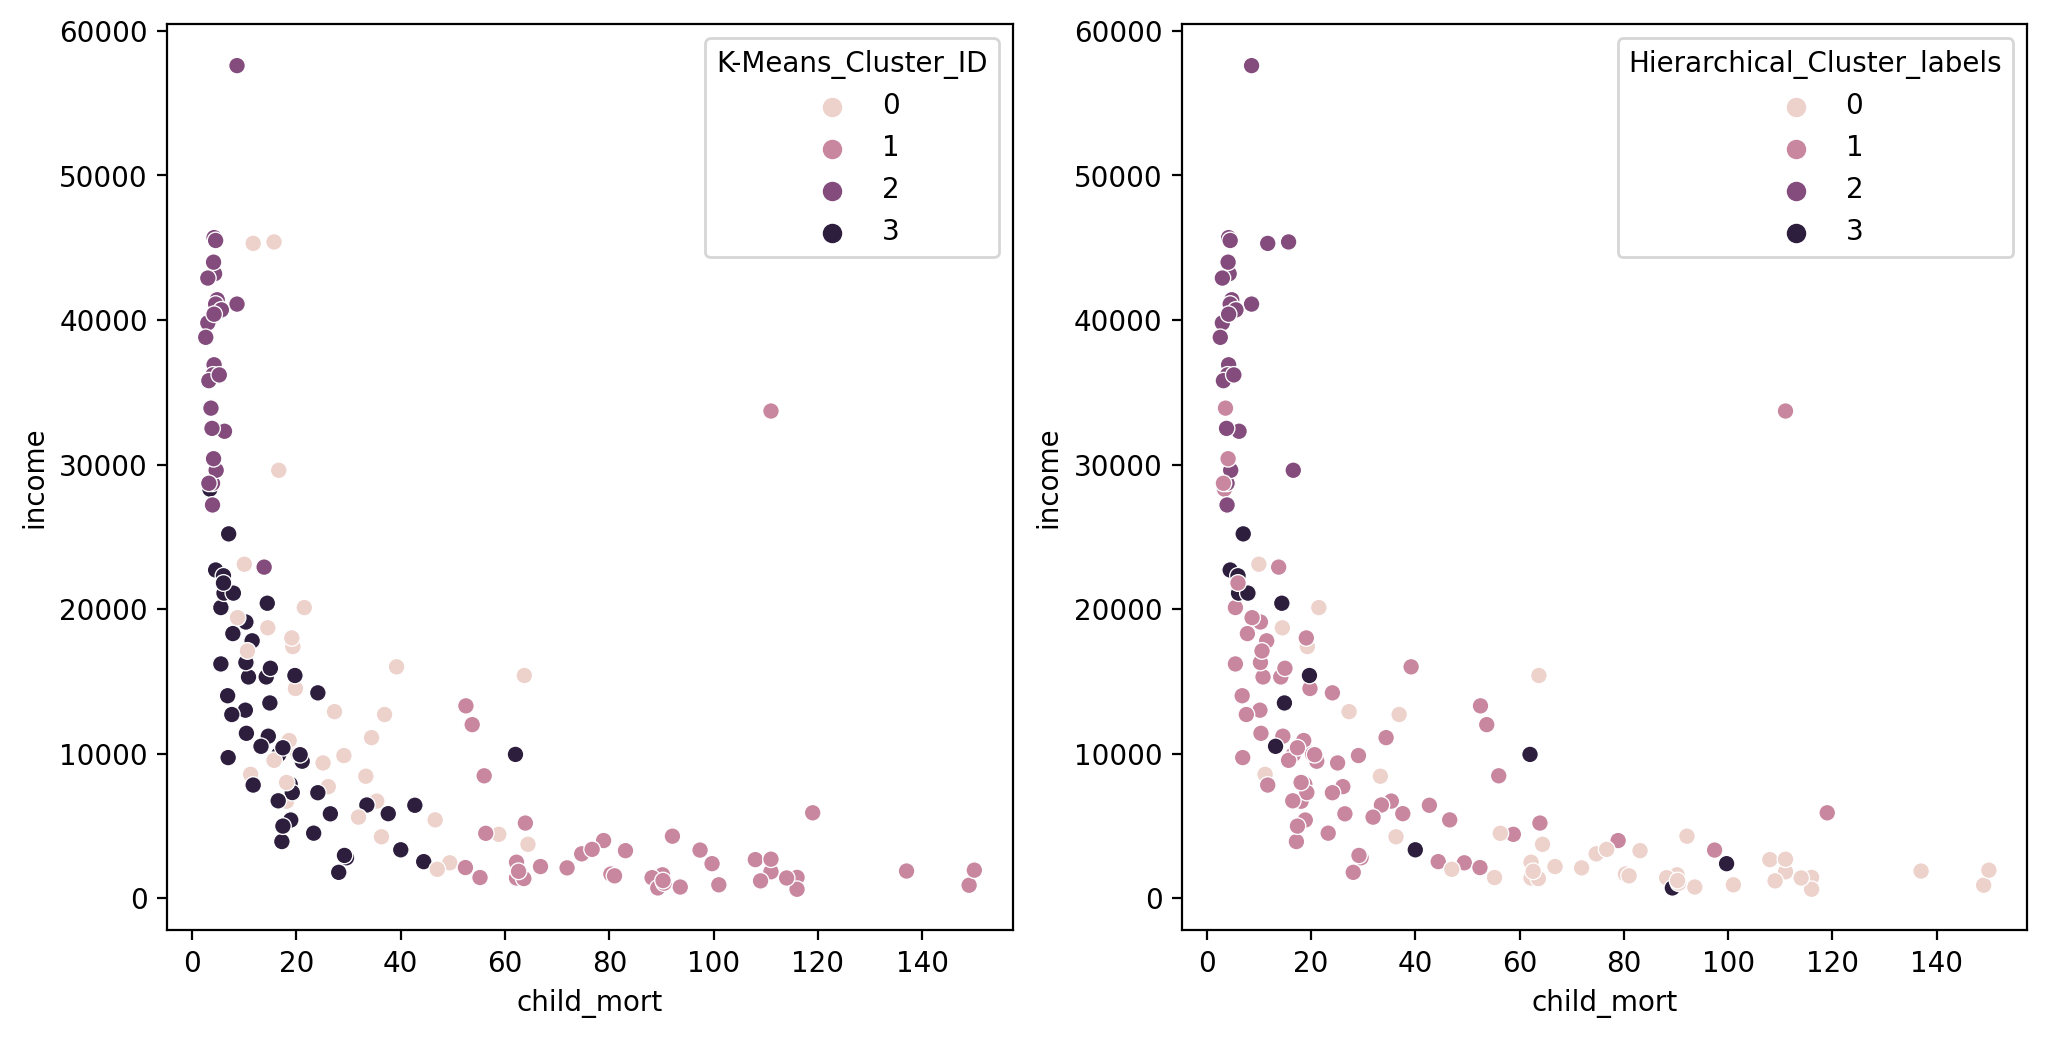

In [65]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='child_mort',y='income',data=country_data_outliers_removed,hue='K-Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='child_mort',y='income',data=country_data_outliers_removed,hue='Hierarchical_Cluster_labels')

Как видно из приведенного выше графика, низкий доход приводит к более высокой детской смертности.

# Страны, остро нуждающиеся в помощи

#### Из K-Means кластеризации

Можно заметить, что страны с кластером, помеченным цифрой 1, нуждаются в помощи.

In [66]:
K_Means_countries = country_data_outliers_removed[country_data_outliers_removed['K-Means_Cluster_ID'] == 1]
K_Means_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID,Hierarchical_Cluster_labels
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1,0
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,1,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1,0
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1,0
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1,0
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1,0


#### Из иерархической кластеризации

Страны с кластером, помеченным цифрой 0, нуждаются в помощи.

In [67]:
Hirarchical_countries = country_data_outliers_removed[
    country_data_outliers_removed['Hierarchical_Cluster_labels'] == 0]
Hirarchical_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID,Hierarchical_Cluster_labels
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,1,0
2,Algeria,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460,0,0
5,Argentina,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300,0,0
17,Benin,111.0,23.800,4.10,37.2000,1820,0.885,61.8,5.36,758,1,0
25,Burkina Faso,116.0,19.200,6.74,29.6000,1430,6.810,57.9,5.87,575,1,0
26,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231,1,0
28,Cameroon,108.0,22.200,5.13,27.0000,2660,1.910,57.3,5.11,1310,1,0
31,Central African Republic,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446,1,0
32,Chad,150.0,36.800,4.53,43.5000,1930,6.390,56.5,6.59,897,1,0
36,Comoros,88.2,16.500,4.51,51.7000,1410,3.870,65.9,4.75,769,1,0


In [68]:
len(Hirarchical_countries)

42

In [69]:
len(K_Means_countries)

42

In [70]:
# общие страны из двух моделей

common_countries = pd.merge(K_Means_countries,
                            Hirarchical_countries,
                            how='inner',
                            on=[
                                'country', 'child_mort', 'exports', 'health',
                                'imports', 'income', 'inflation', 'life_expec',
                                'total_fer', 'gdpp', 'K-Means_Cluster_ID',
                                'Hierarchical_Cluster_labels'
                            ])

In [71]:
common_countries.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'K-Means_Cluster_ID',
       'Hierarchical_Cluster_labels'],
      dtype='object')

In [72]:
common_countries[['country', 'child_mort', 'income','gdpp']]

,country,child_mort,income,gdpp
0,Afghanistan,90.2,1610,553
1,Benin,111.0,1820,758
2,Burkina Faso,116.0,1430,575
3,Burundi,93.6,764,231
4,Cameroon,108.0,2660,1310
5,Central African Republic,149.0,888,446
6,Chad,150.0,1930,897
7,Comoros,88.2,1410,769
8,"Congo, Dem. Rep.",116.0,609,334
9,Cote d'Ivoire,111.0,2690,1220


In [73]:
len(common_countries)

30

In [74]:
# сохраняем в таблицу, сортируем по убыванию детской смертности и возрастанию дохода
common_countries_final = common_countries[[
    'country', 'child_mort', 'income', 'gdpp'
]].sort_values(['child_mort', 'income'], ascending=[False, True])
common_countries_final

,country,child_mort,income,gdpp
6,Chad,150.0,1930,897
5,Central African Republic,149.0,888,446
18,Mali,137.0,1870,708
8,"Congo, Dem. Rep.",116.0,609,334
2,Burkina Faso,116.0,1430,575
14,Guinea-Bissau,114.0,1390,547
1,Benin,111.0,1820,758
9,Cote d'Ivoire,111.0,2690,1220
13,Guinea,109.0,1190,648
4,Cameroon,108.0,2660,1310


Страны, остро нуждающиеся в помощи, можно выбрать из приведенного выше датафрейма:

In [75]:
final_countries = common_countries_final[
    (common_countries_final['child_mort'] > 80)
    & (common_countries_final['income'] < 1200)]
final_countries = final_countries.reset_index(drop=True)
final_countries

,country,child_mort,income,gdpp
0,Central African Republic,149.0,888,446
1,"Congo, Dem. Rep.",116.0,609,334
2,Guinea,109.0,1190,648
3,Mozambique,101.0,918,419
4,Burundi,93.6,764,231
5,Malawi,90.5,1030,459


### Страны, остро нуждающиеся в помощи

1. Центральноафриканская Республика
2. Конго, Дем. Rep.
3. Мозамбик
4. Бурунди
5. Малави
6. Гвинея